# TAREFA DATASET KAGGLE


Para esta fase, o objetivo é alcançar o melhor resultado possível com o dataset da competição fornecido pelos docentes na previsão do nível de incidentes rodoviários, numa determinada hora, na cidade de Guimarães.

### **1.** Importar as bibliotecas essenciais do Python para a elaboração desta tarefa

In [165]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

### **2.** Carregar o dataset para um dataframe da biblioteca Pandas

In [166]:
ds_training = pd.read_csv('docs/training_data.csv', encoding="utf-8", skipinitialspace=True)

### **3.** Obtenção de informação acerca do dataset: tipos de dados das features, conteúdo do dataset e estatística

* **tipos de dados das features**

In [167]:
ds_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


* **conteúdo do dataset**

In [168]:
ds_training.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


* **estatística**

In [169]:
ds_training.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


Distribuição da feature target "incidents"

<AxesSubplot:>

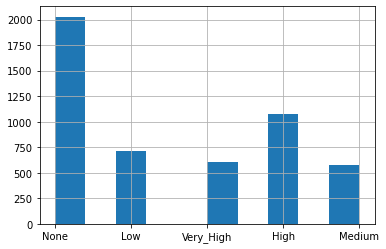

In [170]:
ds_training["incidents"].hist()

Análise dos valores únicos no dataset

In [171]:
for c in ds_training:
    print(f"{c}: {ds_training[c].unique()}")
    print(f"Quantidade: {ds_training[c].nunique()}")
    print("---------------------------------------")

city_name: ['Guimaraes']
Quantidade: 1
---------------------------------------
magnitude_of_delay: ['UNDEFINED' 'MAJOR' 'MODERATE']
Quantidade: 3
---------------------------------------
delay_in_seconds: [   0  385   69 ...  684 8360  896]
Quantidade: 1186
---------------------------------------
affected_roads: [',' 'N101,' 'N101,R206,N105,N101,N101,N101,N101,N101,N101,N101,N101'
 'N101,N101,N101,N101,N101,' 'N101,N101,N101,N101,N101,N101,N101,N101'
 'N101,N101,N101,N101,N101'
 'N101,N101,N101,N101,N101,N101,N101,N101,N101,'
 'N101,N101,N206,N105,N309,N309,N101,N101,IC5,N101,N101,N105,N101,N206,N101,N101,N101,IC5,N101,N101,N105,N101,N101,N105,N309,N101,N101,N101,N101,IC5,N101,N105'
 'N101,N101,N101,N101,N105,N101,N101' 'N101,N101,N101'
 'N101,N101,N101,N101,N101,N101,N101,N101,' nan 'N101,N101'
 'N101,N101,N101,N101,N101,N101,N101,N101,N206,N105,N101,N101,N105,N105,N101,N101,N101,N101,R206,N101,N101,N105'
 'N101,N101,N206,R206,N206,N101,N105,N206,N309,N101,N101,N101,N101,N101,N105,N206

TODO: tabelinha gira da análise da tabela acima

### **4.** Preparação dos dados

In [172]:
ds_training.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [173]:
ds_training.columns

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain',
       'incidents'],
      dtype='object')

**Remoção da feature "avg_precipitation"**

In [174]:
#Possui informação incompleta
ds_training = ds_training.drop('avg_precipitation', axis=1)

**Transformação da coluna *record_date* nas colunas ano, mês, dia, hora e minuto**

In [175]:
ds_training['record_date'] = pd.to_datetime(ds_training['record_date'],format='%Y-%m-%d %H:%M', errors='coerce')
assert ds_training['record_date'].isnull().sum() == 0,'missing record date'

ds_training['record_date_year'] = ds_training['record_date'].dt.year
ds_training['record_date_month'] = ds_training['record_date'].dt.month
ds_training['record_date_day'] = ds_training['record_date'].dt.day
ds_training['record_date_hour'] = ds_training['record_date'].dt.hour
ds_training['record_date_minute'] = ds_training['record_date'].dt.minute
ds_training = ds_training.drop('record_date', axis=1)

ds_training.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute
0,Guimaraes,UNDEFINED,0,",",DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,2021,3,15,23,0
1,Guimaraes,UNDEFINED,385,"N101,",DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,2021,12,25,18,0
2,Guimaraes,UNDEFINED,69,",",LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,2021,3,12,15,0
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,2021,9,29,9,0
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,2021,6,13,11,0


**Remoção das features "city_name", "record_date_year" e "record_date_minute"**

In [176]:
#como apenas existe um valor para "city_name", esta coluna pode ser removida
ds_training = ds_training.drop('city_name', axis=1)

#o mesmo se aplica para o ano e minuto
ds_training = ds_training.drop('record_date_year', axis=1)
ds_training = ds_training.drop('record_date_minute', axis=1)

**Transformação da feature "magnitude_of_delay" em valores numéricos**

In [177]:
ds_training['magnitude_of_delay'].unique()

array(['UNDEFINED', 'MAJOR', 'MODERATE'], dtype=object)

In [178]:
replace_map = {'magnitude_of_delay': {'UNDEFINED':0 ,'MODERATE': 1, 'MAJOR': 2}}
ds_training.replace(replace_map,inplace=True)
ds_training.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour
0,0,0,",",DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,3,15,23
1,0,385,"N101,",DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,12,25,18
2,0,69,",",LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,3,12,15
3,2,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,9,29,9
4,0,0,"N101,N101,N101,N101,N101,",LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,6,13,11


**Tratamento da feature "affected_roads"**

* Tratamento dos missing values

In [179]:
ds_training['affected_roads'].fillna(',',inplace=True) #tratar de missing values
ds_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  5000 non-null   int64  
 1   delay_in_seconds    5000 non-null   int64  
 2   affected_roads      5000 non-null   object 
 3   luminosity          5000 non-null   object 
 4   avg_temperature     5000 non-null   float64
 5   avg_atm_pressure    5000 non-null   float64
 6   avg_humidity        5000 non-null   float64
 7   avg_wind_speed      5000 non-null   float64
 8   avg_rain            5000 non-null   object 
 9   incidents           5000 non-null   object 
 10  record_date_month   5000 non-null   int64  
 11  record_date_day     5000 non-null   int64  
 12  record_date_hour    5000 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 507.9+ KB


* Separação das ruas e remoção de ruas repetidas

In [180]:
affected_roads = {}

#Separação das ruas e remoção de ruas repetidas
for row in ds_training['affected_roads']:
    roads = list(dict.fromkeys(row.split(',')))
    for road in roads:
        affected_roads[road] = []

for row in ds_training['affected_roads']:
    roads = list(dict.fromkeys(row.split(',')))
    for road in affected_roads:
        if road in roads:
            affected_roads[road].append(1)
        else:
            affected_roads[road].append(0)

        
affected_roads = pd.DataFrame.from_dict(affected_roads)
ds_training = ds_training.drop('affected_roads',axis=1)

for column in affected_roads:
    ds_training[column] = affected_roads[column]
    
ds_training

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0,0,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,3,15,23,1,0,0,0,0,0,0,0,0,0,0
1,0,385,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,12,25,18,1,1,0,0,0,0,0,0,0,0,0
2,0,69,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,3,12,15,1,0,0,0,0,0,0,0,0,0,0
3,2,2297,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,9,29,9,0,1,1,1,0,0,0,0,0,0,0
4,0,0,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,6,13,11,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,DARK,13.0,1021.0,56.0,0.0,Sem Chuva,High,4,13,0,1,1,0,0,0,0,0,0,0,0,0
4996,0,0,LIGHT,19.0,1017.0,68.0,0.0,Sem Chuva,None,7,6,14,0,1,0,0,0,0,0,0,0,0,0
4997,0,0,DARK,13.0,1023.0,47.0,2.0,Sem Chuva,None,3,18,3,1,0,0,0,0,0,0,0,0,0,0
4998,0,0,DARK,12.0,1014.0,93.0,2.0,Sem Chuva,None,11,2,6,0,1,0,0,0,0,0,0,0,0,0


**Transformação da feature "luminosity" em valores numéricos**

In [181]:
ds_training['luminosity'].unique()

array(['DARK', 'LIGHT', 'LOW_LIGHT'], dtype=object)

In [182]:
replace_map = {'luminosity': {'LOW_LIGHT':0 ,'LIGHT': 1, 'DARK': 2}}
ds_training.replace(replace_map,inplace=True)
ds_training.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0,0,2,12.0,1013.0,70.0,1.0,Sem Chuva,None,3,15,23,1,0,0,0,0,0,0,0,0,0,0
1,0,385,2,12.0,1007.0,91.0,1.0,Sem Chuva,None,12,25,18,1,1,0,0,0,0,0,0,0,0,0
2,0,69,1,14.0,1025.0,64.0,0.0,Sem Chuva,Low,3,12,15,1,0,0,0,0,0,0,0,0,0,0
3,2,2297,1,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,9,29,9,0,1,1,1,0,0,0,0,0,0,0
4,0,0,1,27.0,1020.0,52.0,1.0,Sem Chuva,High,6,13,11,1,1,0,0,0,0,0,0,0,0,0


**Tranformação da feature "avg_rain" em valores numéricos**

In [183]:
ds_training['avg_rain'].unique()

array(['Sem Chuva', 'chuva moderada', 'chuva fraca', 'chuva forte'],
      dtype=object)

In [184]:
replace_map = {'avg_rain': {'Sem Chuva':0 ,'chuva fraca': 1, 'chuva moderada': 2,'chuva forte' : 3}}
ds_training.replace(replace_map,inplace=True)
ds_training.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0,0,2,12.0,1013.0,70.0,1.0,0,None,3,15,23,1,0,0,0,0,0,0,0,0,0,0
1,0,385,2,12.0,1007.0,91.0,1.0,0,None,12,25,18,1,1,0,0,0,0,0,0,0,0,0
2,0,69,1,14.0,1025.0,64.0,0.0,0,Low,3,12,15,1,0,0,0,0,0,0,0,0,0,0
3,2,2297,1,15.0,1028.0,75.0,1.0,0,Very_High,9,29,9,0,1,1,1,0,0,0,0,0,0,0
4,0,0,1,27.0,1020.0,52.0,1.0,0,High,6,13,11,1,1,0,0,0,0,0,0,0,0,0


**Transformação da feature "incidents" em valores numéricos**

In [185]:
replace_map = {'incidents': {'None':0 ,'Low': 1, 'Medium': 2, 'High': 3, 'Very_High': 4}}
ds_training.replace(replace_map,inplace=True)
ds_training.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour,,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,0,0,2,12.0,1013.0,70.0,1.0,0,0,3,15,23,1,0,0,0,0,0,0,0,0,0,0
1,0,385,2,12.0,1007.0,91.0,1.0,0,0,12,25,18,1,1,0,0,0,0,0,0,0,0,0
2,0,69,1,14.0,1025.0,64.0,0.0,0,1,3,12,15,1,0,0,0,0,0,0,0,0,0,0
3,2,2297,1,15.0,1028.0,75.0,1.0,0,4,9,29,9,0,1,1,1,0,0,0,0,0,0,0
4,0,0,1,27.0,1020.0,52.0,1.0,0,3,6,13,11,1,1,0,0,0,0,0,0,0,0,0


### 5. Aplicação de modelos de machine learning

#### 5.1. Decision Tree Classifier

Imports necessários para a implementação deste modelo

In [186]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn import tree

In [187]:
x_train, x_test, y_train,y_test = train_test_split(ds_training,ds_training["incidents"],test_size=0.25,random_state=2022)

Treino do modelo

In [188]:
clf = DecisionTreeClassifier(random_state=2022)
clf = clf.fit(x_train,y_train)

Visualização da árvore de decisão

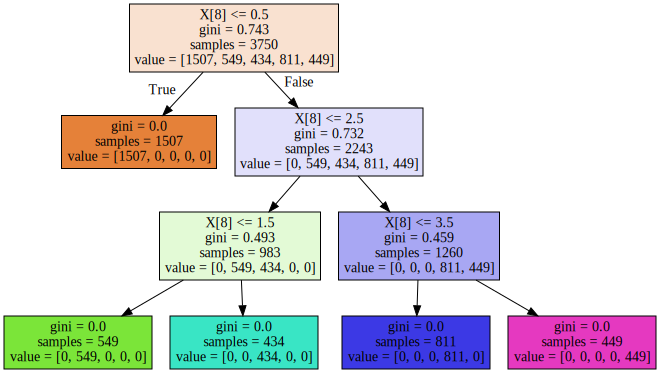

In [189]:
tree.export_graphviz(clf,
                     out_file="tree_dsCompeticao.dot",
                     filled = True)

from graphviz import Source
Source.from_file("tree_dsCompeticao.dot")

Geração de previsões

In [190]:
predictions = clf.predict(x_test)
pd.DataFrame(predictions)

,0
0,1
1,4
2,0
3,0
4,1
...,...
1245,2
1246,4
1247,2
1248,3


In [191]:
y_test

3419    1
178     4
3721    0
3087    0
3685    1
       ..
1266    2
4556    4
1371    2
4911    3
3642    3
Name: incidents, Length: 1250, dtype: int64

Avaliação do modelo

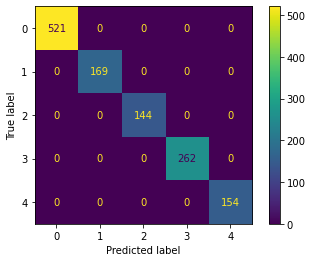

In [192]:
plot_confusion_matrix(clf, x_test, y_test) 

In [193]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       521
           1       1.00      1.00      1.00       169
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00       262
           4       1.00      1.00      1.00       154

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250



In [194]:
mean_absolute_error(y_test,predictions)

0.0

#### 5.2 Logistic Regression

In [197]:
from sklearn.linear_model import LogisticRegression

In [198]:
lr = LogisticRegression(random_state=2022)

In [200]:
#lr.fit(x,y)

#### 5.3 Support Vector Machine

#### 5.4 Redes neuronais

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

RANDOM_SEED = 2022

print("TensorFlow version:", tf.__version__)

In [ ]:
x = ds_training.drop('incidents',axis=1)
y = ds_training[['incidents']]

In [ ]:
df.info